# Data Cleaning

In [3]:
import numpy as np 
import pandas as pd 
data = pd.read_csv("Loan Dataset.csv")

In [4]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0


In [5]:
data.shape

(5000, 14)

The output shows that the dataset consists of 5000 observations and 14 variables

In [6]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

This output shows that non o.f the variable has null value/empty cells

In [7]:
data.drop('ID',axis=1,inplace=True)
data.drop('ZIP Code',axis=1,inplace=True)

It is necessary to drop the columns those are irrelavant

In [8]:
# Exporting the clened data as a csv file

data.to_csv('cleaned_data.csv', index=False)

# Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

HEATMAP

In [10]:
correlation_matrix = data.corr()

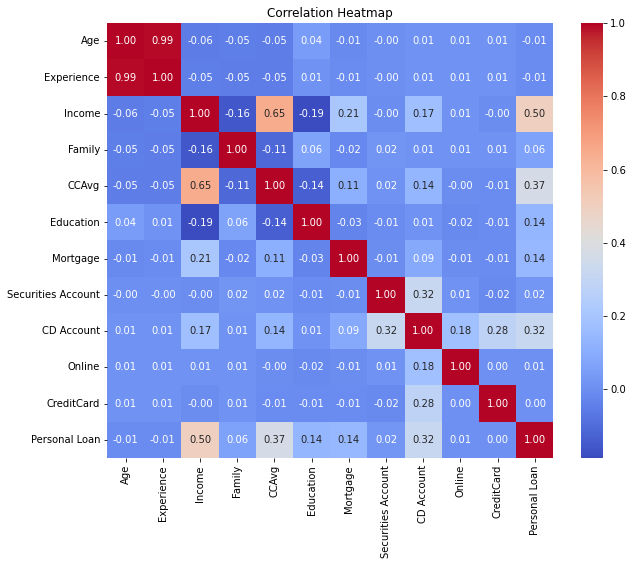

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

This heatmap shows the correlataion between 'personal loan' and other independent variables. It is clear from the diagram that 'income' has the highest correlation with 'personal loan'. It also shows a correlation of 0.32 between 'CD Account' and 'Personal Loan' and a correlation of 0.37 with 'CCAvg'. There exists a correlation of 0.14 between 'education' and 'personal loan'. Same for 'mortgage and 'personal loan'.

HISTOGRAM

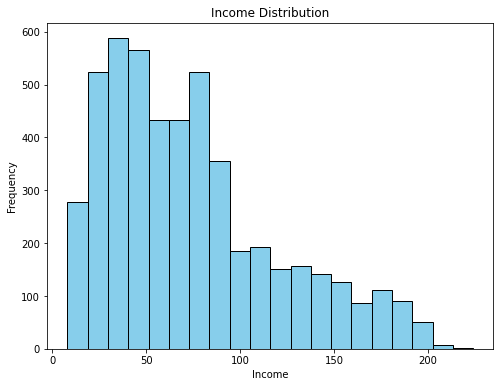

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(data['Income'], bins=20, color='skyblue', edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

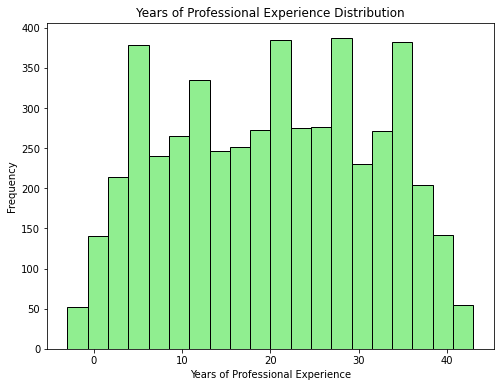

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(data['Experience'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Years of Professional Experience Distribution')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

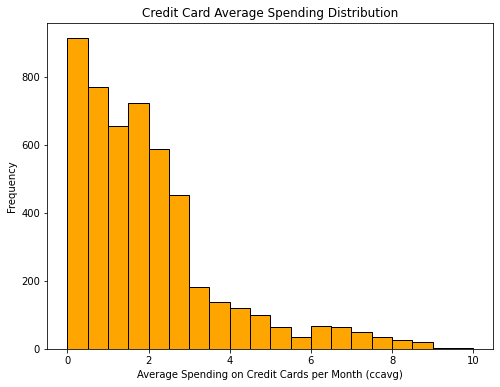

In [14]:
plt.figure(figsize=(8, 6))
plt.hist(data['CCAvg'], bins=20, color='orange', edgecolor='black')
plt.title('Credit Card Average Spending Distribution')
plt.xlabel('Average Spending on Credit Cards per Month (ccavg)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

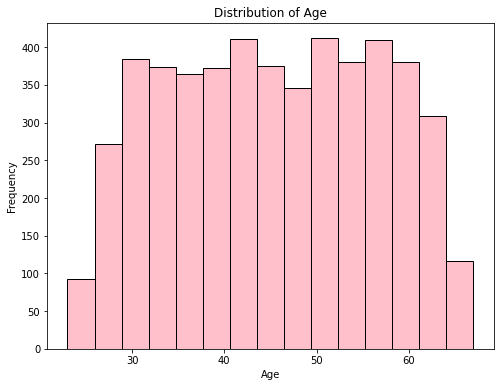

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=15, color='pink', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

PIE CHART

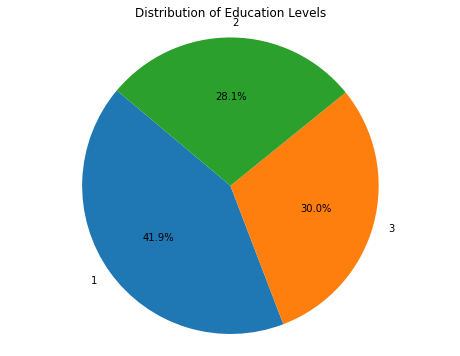

In [16]:
education_counts = data['Education'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Education Levels')
plt.axis('equal') 
plt.show()


BAR CHART

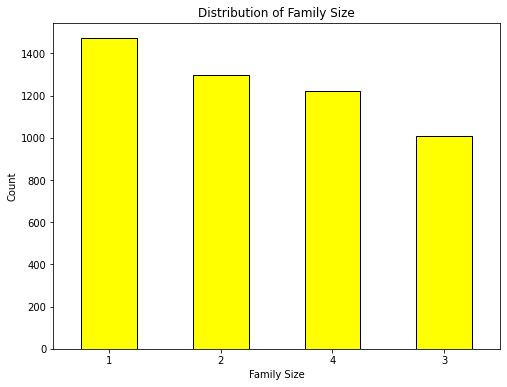

In [17]:
family_counts = data['Family'].value_counts()
plt.figure(figsize=(8, 6))
family_counts.plot(kind='bar', color='yellow',edgecolor='black')
plt.title('Distribution of Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed 
plt.show()

# Model Building - KNN Model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
# Split the dataset into independent (X) and dependent variable (y)
X = data[['Income','Family','CD Account','Mortgage','Online','Education','CCAvg']]  # Independent Variables
y = data['Personal Loan']  # Dependent Variable

The stepwise selection method has been used to do the variable selection. This is the combination of the variables that gives the highest accuracy and precision.

In [20]:
# Split the data into training, validation, and testing sets (60% train, 20% validation, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [21]:
# Initialize and fit the kNN model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)  # Initialize kNN model with 5 neighbors (you can adjust k as needed)
knn.fit(X_train, y_train)  # Fit the model on the training data

KNeighborsClassifier()

In [22]:
# Make predictions on the validation data
y_val_pred = knn.predict(X_val)

In [23]:
# Evaluate the model on the validation data
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.922


In [24]:
# Make predictions on the test data
y_test_pred = knn.predict(X_test)

In [25]:
# Evaluate the model on the test data
accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.938


In [26]:
# Print classification report and confusion matrix for test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))


Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       906
           1       0.69      0.62      0.65        94

    accuracy                           0.94      1000
   macro avg       0.83      0.79      0.81      1000
weighted avg       0.94      0.94      0.94      1000



In [27]:
print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred))


Confusion Matrix (Test Data):
[[880  26]
 [ 36  58]]


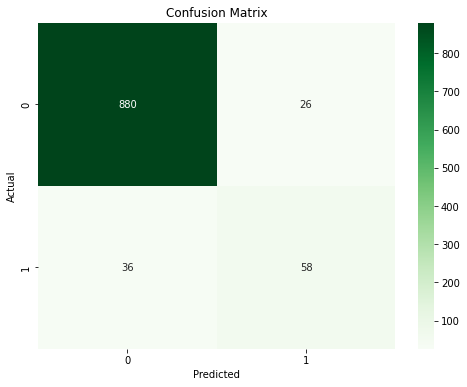

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, cmap='Greens', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [68]:
X = data[['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'CD Account', 'Online']]
y = data['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
# Initialize and fit the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [71]:
# Make predictions
y_pred = dt_classifier.predict(X_test_scaled)

In [72]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9806666666666667


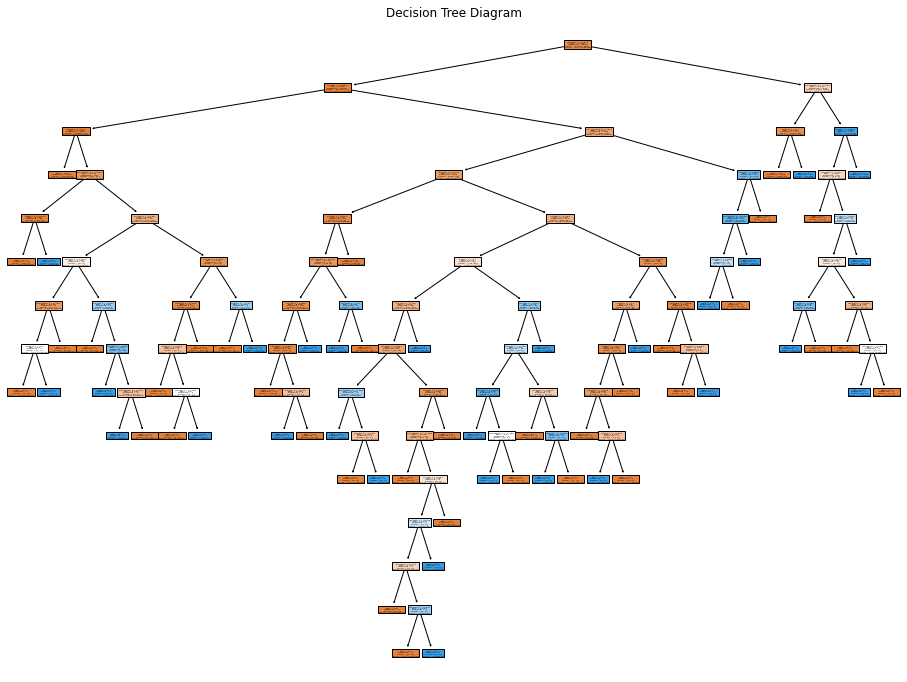

In [77]:
plt.figure(figsize=(16, 12))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Not Accepted', 'Accepted'], filled=True)
plt.title("Decision Tree Diagram")
plt.show()

In [78]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.92      0.89      0.91       157

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



In [79]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1331   12]
 [  17  140]]


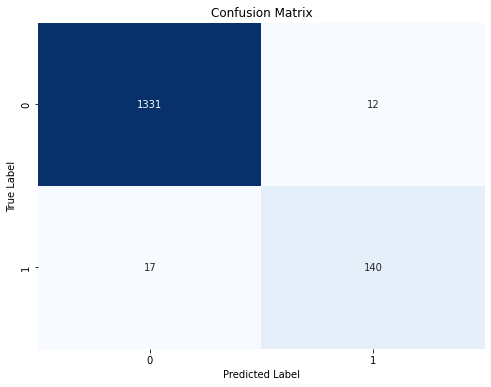

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Random Forest

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [82]:
X = data[['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'CD Account', 'Online']]
y = data['Personal Loan']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [85]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [86]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.99


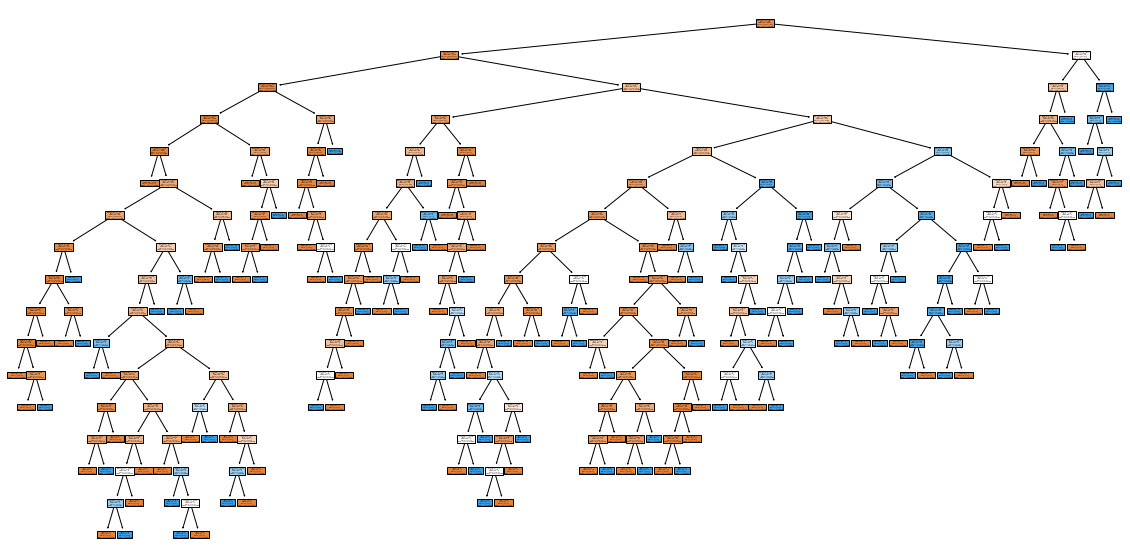

In [87]:
# Plotting a decision tree from the Random Forest
plt.figure(figsize=(20,10))
plot_tree(rf_classifier.estimators_[0], feature_names=X.columns, class_names=["Not Accepted", "Accepted"], filled=True)
plt.show()

In [88]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[893   2]
 [  8  97]]


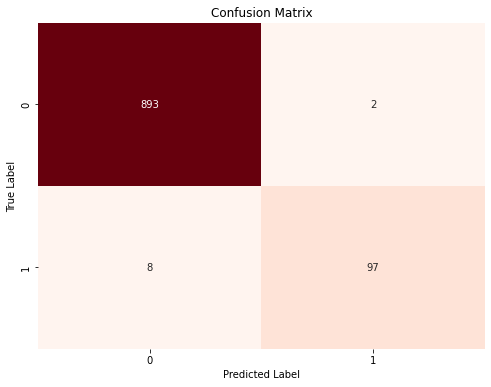

In [90]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [91]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.98      0.92      0.95       105

    accuracy                           0.99      1000
   macro avg       0.99      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000



In [92]:
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0,0
4996,30,4,15,4,0.4,1,85,0,0,1,0,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0,0


In [93]:
print(data.describe())

               Age   Experience       Income       Family        CCAvg  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     45.338400    20.104600    73.774200     2.396400     1.937938   
std      11.463166    11.467954    46.033729     1.147663     1.747659   
min      23.000000    -3.000000     8.000000     1.000000     0.000000   
25%      35.000000    10.000000    39.000000     1.000000     0.700000   
50%      45.000000    20.000000    64.000000     2.000000     1.500000   
75%      55.000000    30.000000    98.000000     3.000000     2.500000   
max      67.000000    43.000000   224.000000     4.000000    10.000000   

         Education     Mortgage  Securities Account  CD Account       Online  \
count  5000.000000  5000.000000         5000.000000  5000.00000  5000.000000   
mean      1.881000    56.498800            0.104400     0.06040     0.596800   
std       0.839869   101.713802            0.305809     0.23825     0.490589   
min       1.0

# Logistic Regression

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [95]:
# Separate features (X) and target variable (y)
X = data[['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'CD Account', 'Online']]
y = data['Personal Loan']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_reg = LogisticRegression()

# Train the model
logistic_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.945


C:\Users\amrut\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[882  13]
 [ 42  63]]


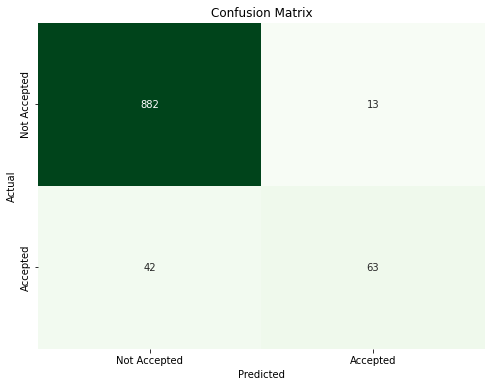

In [101]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False, 
            xticklabels=["Not Accepted", "Accepted"], yticklabels=["Not Accepted", "Accepted"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [102]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       895
           1       0.83      0.60      0.70       105

    accuracy                           0.94      1000
   macro avg       0.89      0.79      0.83      1000
weighted avg       0.94      0.94      0.94      1000



In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

ROC AUC: 0.9593508911944666


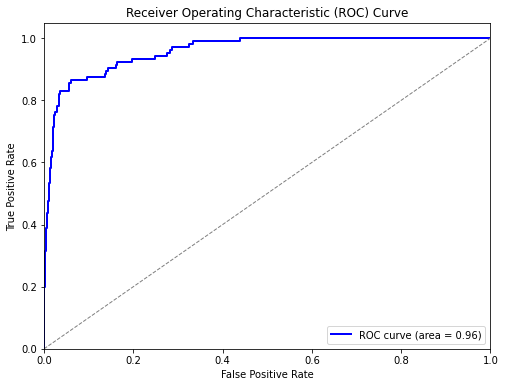

In [106]:
# Predict probabilities
y_probs = logistic_reg.predict_proba(X_test)

# Keep probabilities for the positive outcome only
y_probs = y_probs[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute ROC area under the curve
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()